Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,859,360 (7.09 MB)

 Trainable params: 619,786 (2.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,239,574 (4.73 MB)

20180773 유우식


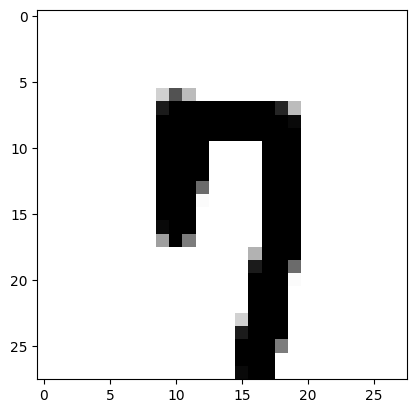

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
0 7.928873e-15
1 4.2236244e-14
2 4.450115e-18
3 4.3938302e-16
4 3.219467e-16
5 5.5820653e-15
6 2.6261912e-22
7 1.0
8 8.488728e-18
9 3.391789e-11
max arg= 7 [ 1.0 ]


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Define the custom softmax_v2 function if it is not already available
def softmax_v2(x):
    return tf.nn.softmax(x, axis=-1)

# Load the model using custom_objects
MODEL_SAVE_FOLDER_PATH = './model/'
custom_objects = {'softmax_v2': softmax_v2}

#model = tf.keras.models.load_model(MODEL_SAVE_FOLDER_PATH + "mnist_model.hdf5", custom_objects=custom_objects)
model = tf.keras.models.load_model(MODEL_SAVE_FOLDER_PATH + "mnist_model.keras")
    
model.summary()
print("20180773 유우식")
file="num7.jpg"		# 흰바탕-검은글씨
image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (28,28))
image = image.astype('float32')
image = image.reshape(1, 28, 28, 1)
image = 255-image          #inverts image. 검은바탕에 흰글시
image /= 255 	               #0..1사이의 값

plt.imshow(image.reshape(28, 28),cmap='Greys')
plt.show()

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
pred = model.predict(image.reshape(1, 28, 28, 1), batch_size=1)
for i in range(10):
    print(class_names[i], pred[0][i])
print("max arg=",np.argmax(pred),"[",np.max(pred),"]")


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,859,360 (7.09 MB)

 Trainable params: 619,786 (2.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,239,574 (4.73 MB)

20180773 유우식


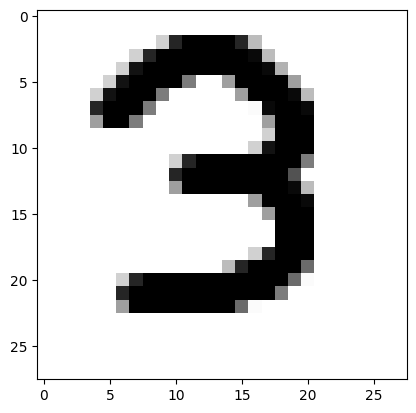

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
0 7.566605e-19
1 2.3732e-14
2 2.5566734e-12
3 1.0
4 1.3211126e-20
5 1.0684214e-13
6 1.2550833e-18
7 4.297573e-14
8 1.7572883e-12
9 2.39142e-15
max arg= 3 [ 1.0 ]


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Define the custom softmax_v2 function if it is not already available
def softmax_v2(x):
    return tf.nn.softmax(x, axis=-1)

# Load the model using custom_objects
MODEL_SAVE_FOLDER_PATH = './model/'
custom_objects = {'softmax_v2': softmax_v2}

#model = tf.keras.models.load_model(MODEL_SAVE_FOLDER_PATH + "mnist_model.hdf5", custom_objects=custom_objects)
model = tf.keras.models.load_model(MODEL_SAVE_FOLDER_PATH + "mnist_model.keras")
    
model.summary()
print("20180773 유우식")
file="num3.jpg"		# 흰바탕-검은글씨
image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (28,28))
image = image.astype('float32')
image = image.reshape(1, 28, 28, 1)
image = 255-image          #inverts image. 검은바탕에 흰글시
image /= 255 	               #0..1사이의 값

plt.imshow(image.reshape(28, 28),cmap='Greys')
plt.show()

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
pred = model.predict(image.reshape(1, 28, 28, 1), batch_size=1)
for i in range(10):
    print(class_names[i], pred[0][i])
print("max arg=",np.argmax(pred),"[",np.max(pred),"]")


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Define the custom softmax_v2 function if it is not already available
def softmax_v2(x):
    return tf.nn.softmax(x, axis=-1)

# Load the model using custom_objects
MODEL_SAVE_FOLDER_PATH = './model/'
custom_objects = {'softmax_v2': softmax_v2}

#model = tf.keras.models.load_model(MODEL_SAVE_FOLDER_PATH + "mnist_model.hdf5", custom_objects=custom_objects)
model = tf.keras.models.load_model(MODEL_SAVE_FOLDER_PATH + "mnist_model.keras")
    
model.summary()
print("20180773 유우식")
file="num9.jpg"		# 흰바탕-검은글씨
image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (28,28))
image = image.astype('float32')
image = image.reshape(1, 28, 28, 1)
image = 255-image          #inverts image. 검은바탕에 흰글시
image /= 255 	               #0..1사이의 값

plt.imshow(image.reshape(28, 28),cmap='Greys')
plt.show()

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
pred = model.predict(image.reshape(1, 28, 28, 1), batch_size=1)
for i in range(10):
    print(class_names[i], pred[0][i])
print("max arg=",np.argmax(pred),"[",np.max(pred),"]")


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,859,360 (7.09 MB)

 Trainable params: 619,786 (2.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,239,574 (4.73 MB)

20180773 유우식


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,859,360 (7.09 MB)

 Trainable params: 619,786 (2.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,239,574 (4.73 MB)

20180773 유우식


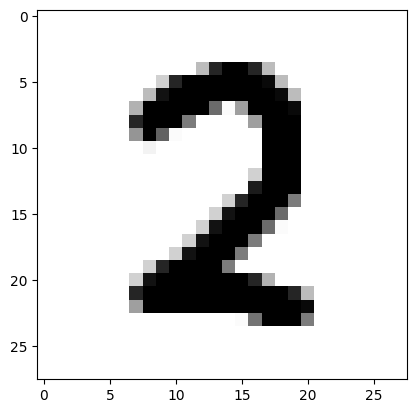

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
0 8.51568e-18
1 1.6243867e-15
2 1.0
3 1.981903e-11
4 1.7072606e-21
5 1.0721939e-21
6 5.1604838e-21
7 1.801253e-14
8 6.7337466e-14
9 1.18563885e-20
max arg= 2 [ 1.0 ]


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Define the custom softmax_v2 function if it is not already available
def softmax_v2(x):
    return tf.nn.softmax(x, axis=-1)

# Load the model using custom_objects
MODEL_SAVE_FOLDER_PATH = './model/'
custom_objects = {'softmax_v2': softmax_v2}

#model = tf.keras.models.load_model(MODEL_SAVE_FOLDER_PATH + "mnist_model.hdf5", custom_objects=custom_objects)
model = tf.keras.models.load_model(MODEL_SAVE_FOLDER_PATH + "mnist_model.keras")
    
model.summary()
print("20180773 유우식")
file="num2.jpg"		# 흰바탕-검은글씨
image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (28,28))
image = image.astype('float32')
image = image.reshape(1, 28, 28, 1)
image = 255-image          #inverts image. 검은바탕에 흰글시
image /= 255 	               #0..1사이의 값

plt.imshow(image.reshape(28, 28),cmap='Greys')
plt.show()

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
pred = model.predict(image.reshape(1, 28, 28, 1), batch_size=1)
for i in range(10):
    print(class_names[i], pred[0][i])
print("max arg=",np.argmax(pred),"[",np.max(pred),"]")
